In [ ]:
## Data Analysis and visualization using pandas

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline
x="YearsExperience"
y="Salary"

In [94]:
df = pd.read_csv("SalaryData.csv")
df.shape

(30, 2)

In [59]:
#df.describe()

In [9]:
#df.head()

In [26]:
df.isnull().any().values

array([False, False], dtype=bool)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


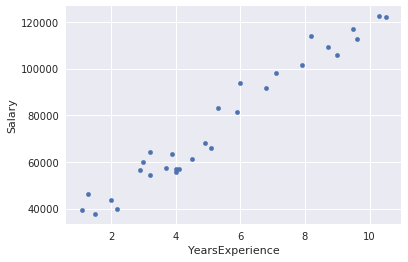

In [67]:
df.plot.scatter(x,y)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


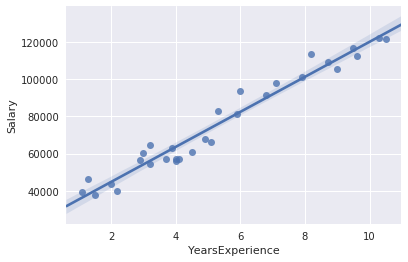

In [68]:
sns.regplot(x,y,data=df)

In [71]:
#df.corr()

In [ ]:
## Data Splitting and data_set_preparation

In [95]:
train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)  #for consistence accuracy

In [96]:
train_cpy = train_set.copy() 
test_cpy = test_set.copy()

In [79]:
train_cpy.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.187500,74207.625000
std,2.943129,28240.733473
min,1.100000,37731.000000
25%,2.975000,55456.750000
50%,4.300000,62164.500000
75%,7.300000,99030.250000
max,10.500000,122391.000000


In [80]:
test_cpy.describe()

,YearsExperience,Salary
count,6.000000,6.000000
mean,5.816667,83184.500000
std,2.546697,24757.930695
min,3.200000,57189.000000
25%,4.000000,65318.250000
50%,5.100000,75513.000000
75%,7.475000,105248.250000
max,9.600000,113812.000000


In [82]:
#sns.regplot(x,y,train_set)

In [ ]:
## preparation of train_data(df) and label(series) for LinearRegression().fit()

In [97]:
train_data = train_cpy.drop([y],axis=1)
label = train_set[y]

In [ ]:
## Builing our model train_data and label 

In [98]:
lin_reg = LinearRegression()
lin_reg.fit(train_data,label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
## making test_data dataframe

In [99]:
test_cpy=test_cpy.drop([y],axis=1)

In [86]:
test_cpy.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [100]:
lin_reg.predict(test_cpy)

array([ 115790.21011287,   71498.27809463,  102596.86866063,
         75267.80422384,   55477.79204548,   60189.69970699])

In [88]:
test_cpy

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


In [ ]:
## Making prediction using our trained model

In [101]:
salary_pred =lin_reg.predict(test_cpy)

In [ ]:
## Validating our model prediction with original test_set

In [57]:
test_set

,YearsExperience,Salary
27,9.6,112635.0
15,4.9,67938.0
23,8.2,113812.0
17,5.3,83088.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
## Checking the accuracy of our model using .score method(Scoring our model)

In [102]:
lin_reg.score(train_data,label)

0.96454015734181464

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


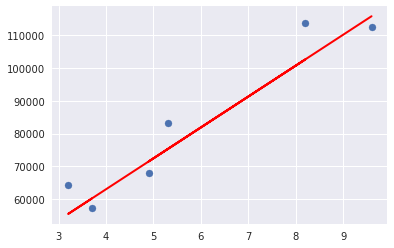

In [105]:
plt.scatter(test_set[x],test_set[y])

plt.plot(test_set[x],salary_pred,color='red',linewidth=2)

